In [6]:
import os
import torch

os.environ["MKL_NUM_THREADS"]="1"
os.environ["NUMEXPR_NUM_THREADS"]="1"
os.environ["OMP_NUM_THREADS"]="1"

import sys

import pytorch_lightning as pl
from omegaconf import DictConfig, OmegaConf
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
from torch.utils.data import random_split
from torch_geometric.data import DataLoader

from spatial.merfish_dataset import FilteredMerfishDataset, MerfishDataset
from spatial.models.monet_ae import MonetAutoencoder2D, TrivialAutoencoder
from spatial.train import train
from spatial.predict import test

In [7]:
rad_to_neighbors = {}

for radius in range(100):
    data = MerfishDataset("../data", radius=radius)
    for graph in data:
        if radius not in rad_to_neighbors:
            rad_to_neighbors[radius] = graph.edge_index.shape[1]/2/graph.x.shape[0]
        else:
            rad_to_neighbors[radius] += graph.edge_index.shape[1]/2/graph.x.shape[0]
    rad_to_neighbors[radius] /= len(data)
    print(radius, rad_to_neighbors[radius])

0 0.0
1 5.934811998871704e-06
2 4.712647899020567e-05
3 0.00038518284906594605
4 0.0016345671305738063
5 0.005416034967251492
6 0.015386426552562215
7 0.03661573307797826
8 0.07123472243794651
9 0.11631550314170142
10 0.16741891437648374
11 0.22218424159781472
12 0.28020778576537453
13 0.3421613723625955
14 0.4078870249991414
15 0.4805444025906334
16 0.5614650408108259
17 0.6512190907539629
18 0.750209024018665
19 0.8583918945548875
20 0.9764132198097715
21 1.1024741126523174
22 1.2362498381565514
23 1.3778568052328282
24 1.524953927587012
25 1.6782339393000536
26 1.8368068999213358
27 2.000817017764461
28 2.1699591663278115
29 2.3438030158181204
30 2.523477377061484
31 2.7069789292411013
32 2.896515538684333
33 3.0909392783334746
34 3.2910853033092624
35 3.4958000812551457
36 3.707103490111549
37 3.92447050472943
38 4.1470536595488765
39 4.375272145477394
40 4.60938084143557
41 4.8487021446464995
42 5.093983355415935
43 5.345140031525933
44 5.60112699812379
45 5.862853427935883
46 6.1

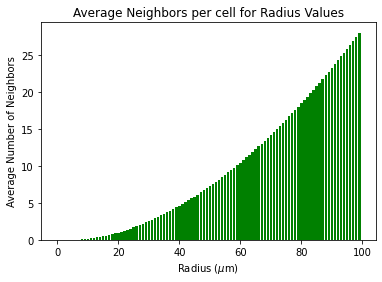

In [13]:
import matplotlib.pyplot as plt

plt.bar(list(rad_to_neighbors.keys()), rad_to_neighbors.values(), color='g')
plt.title("Average Neighbors per cell for Radius Values")
plt.xlabel("Radius ($\mu$m)")
plt.ylabel("Average Number of Neighbors")
plt.show()

In [ ]:
rad_to_neighbors = {}

for radius in range(100):
    data = FilteredMerfishDataset("../data", radius=radius)
    for graph in data:
        if radius not in rad_to_neighbors:
            rad_to_neighbors[radius] = graph.edge_index.shape[1]//2
        else:
            rad_to_neighbors[radius] += graph.edge_index.shape[1]//2
    rad_to_neighbors[radius] /= len(data)
    print(radius, rad_to_neighbors[radius], graph.x.shape[0])

In [2]:
rad_to_neighbors = {}

for radius in range(95,100):
    data = FilteredMerfishDataset("../data", radius=radius)
    for graph in data:
        if radius not in rad_to_neighbors:
            rad_to_neighbors[radius] = graph.edge_index.shape[1]//2
        else:
            rad_to_neighbors[radius] += graph.edge_index.shape[1]//2
    rad_to_neighbors[radius] /= len(data)
    print(radius, rad_to_neighbors[radius], graph.x.shape[0])

../data/raw/merfish_messi.hdf5
95 145594.6923076923 5399
../data/raw/merfish_messi.hdf5
96 148601.52662721893 5399
../data/raw/merfish_messi.hdf5
97 151629.68047337278 5399
../data/raw/merfish_messi.hdf5
98 154692.99408284025 5399
../data/raw/merfish_messi.hdf5
99 157778.9822485207 5399
